In [1]:
from utils import load_cnf, cnf_to_bqm
from redundancy import initialize_mirror_vars, mirror_variable, update_bqm_mirror_variables,update_bqm_single_mirror
from redundancy import get_bqm_chain_lengths
from embedding_utils import count_qubits_used
from minorminer import find_embedding
from dwave.system import DWaveSampler, FixedEmbeddingComposite
from greedy import SteepestDescentComposite
from embedding_utils import get_chain_lengths
import seaborn as sns

In [2]:
original_vars_to_mirrors = dict()
mirrors = dict()
num_variables, num_clauses, variables, clauses = load_cnf(f"./sebastiani-sat/var100.cnf")
# initialize_mirror_vars(variables, mirrors, original_vars_to_mirrors)
# for var in range(1,101):
#     mirror_variable(var, variables, clauses, mirrors, original_vars_to_mirrors)
bqm, or_result_vars, clauses_qubits = cnf_to_bqm(variables, clauses)
# for i in range(1, 101):
#     update_bqm_single_mirror(bqm, i, mirrors, original_vars_to_mirrors)

In [17]:
num_variables

100

<AxesSubplot:ylabel='Count'>

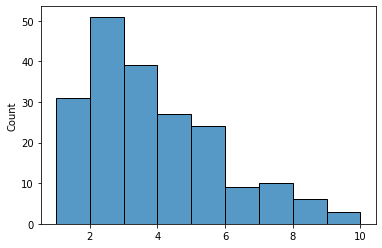

In [3]:
qpu_pegasus = DWaveSampler(solver={'topology__type': 'pegasus'})
embedding = find_embedding(bqm.quadratic.keys(), qpu_pegasus.edgelist, random_seed=134)

sns.histplot(get_chain_lengths(bqm, embedding)[0])

In [4]:
from dwave.preprocessing.lower_bounds import roof_duality
roof_duality(bqm)

(-100.0, {})

In [139]:
embedding

{7: [1030, 4775, 4804],
 2: [1105, 1104, 4685],
 5: [5300, 5298, 5299, 1077, 5297, 1076, 1075, 807],
 10: [4654, 1014, 924, 4653, 923],
 6: [383, 384, 386, 4517, 4516, 387, 4518, 4519, 385],
 14: [597, 5072, 5071, 596, 4923, 595, 5070],
 11: [311, 310, 5010, 4771],
 15: [896, 897, 895],
 9: [671, 670, 669, 5073, 5074],
 16: [791, 792, 4893, 790, 789, 4833],
 4: [5343, 837],
 18: [5522, 5521, 674],
 1: [1093, 5404, 5405, 5403, 1090, 1092, 643, 1091],
 19: [4832, 4830, 565, 505, 4831],
 3: [5012, 5011, 355, 5013, 746, 745, 356],
 20: [1135, 1136, 4880, 4761, 4715],
 22: [509, 5536, 374, 5535],
 23: [762, 5208, 763],
 24: [5253, 748],
 25: [5415, 253],
 28: [474, 4816, 4815, 4697],
 30: [98, 4502, 4501, 4500, 4503, 99, 4504, 100, 101],
 31: [4802, 4801, 4800, 4803],
 32: [4546, 4547, 744, 4548, 399, 803],
 27: [1060, 1061, 819, 1062, 5270, 1059, 4699, 4700, 4698, 1108],
 33: [5342, 627, 5341, 568, 5340],
 8: [5222, 463, 5386, 462],
 35: [5565, 5566, 5567, 5568, 854, 479],
 12: [327, 326, 

In [6]:
sampler = FixedEmbeddingComposite(DWaveSampler(solver={"name": "Advantage_system4.1"}), embedding)
sampleset = sampler.sample(bqm, num_reads=1000, answer_mode='raw', chain_strength=1.75, auto_scale=True)
sampleset.first.energy

8.0

In [97]:
import neal

simulated_sampler = neal.SimulatedAnnealingSampler()
sampleset = simulated_sampler.sample(bqm,initial_state=sampleset.first[0], num_sweeps=10000000)
sampleset.first.energy

2.0

In [64]:
sampleset.first[0]

{1: 1,
 2: 0,
 3: 1,
 4: 0,
 5: 0,
 6: 0,
 7: 1,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 1,
 15: 0,
 16: 0,
 17: 0,
 18: 0,
 19: 0,
 20: 0,
 21: 0,
 22: 1,
 23: 1,
 24: 0,
 25: 0,
 26: 1,
 27: 1,
 28: 0,
 29: 1,
 30: 0,
 31: 1,
 32: 0,
 33: 0,
 34: 0,
 35: 0,
 36: 0,
 37: 0,
 38: 0,
 39: 0,
 40: 0,
 41: 1,
 42: 0,
 43: 0,
 44: 0,
 45: 1,
 46: 0,
 47: 0,
 48: 0,
 49: 0,
 50: 0,
 51: 0,
 52: 0,
 53: 1,
 54: 0,
 55: 0,
 56: 0,
 57: 1,
 58: 0,
 59: 0,
 60: 1,
 61: 0,
 62: 1,
 63: 1,
 64: 0,
 65: 0,
 66: 0,
 67: 0,
 68: 0,
 69: 0,
 70: 0,
 71: 0,
 72: 0,
 73: 1,
 74: 0,
 75: 0,
 76: 0,
 77: 0,
 78: 0,
 79: 1,
 80: 1,
 81: 0,
 82: 0,
 83: 0,
 84: 0,
 85: 0,
 86: 0,
 87: 0,
 88: 0,
 89: 1,
 90: 0,
 91: 0,
 92: 0,
 93: 1,
 94: 1,
 95: 0,
 96: 0,
 97: 0,
 98: 1,
 99: 0,
 100: 1,
 101: 1,
 102: 1,
 103: 1,
 104: 1,
 105: 1,
 106: 1,
 107: 1,
 108: 1,
 109: 1,
 110: 1,
 111: 1,
 112: 1,
 113: 1,
 114: 1,
 115: 1,
 116: 1,
 117: 1,
 118: 1,
 119: 1,
 120: 1,
 121: 1,
 122: 1,
 123: 1,
 

In [ ]:
answer_path = "./sat/sgen1-sat-140-100_result.cnf"
answer_file = open(answer_path)
answer = dict()

cnf_result = answer_file.readline().split(" ")
assert (int(cnf_result[-1]) == 0)

for x in cnf_result[:-1]:
    int_x = int(x)
    value = int(int_x > 0)
    answer[abs(int_x)] = value
    for mirror in original_vars_to_mirrors[abs(int_x)]:
        answer[mirror] = value
answer_file.close()

In [65]:
answer = dict()
for (var, mirrors) in original_vars_to_mirrors.items():
    answer[var] = sampleset.first[0][var]
    for mirror in mirrors:
        assert(answer[var] == samplet.first[0][mirror])
        answer[mirror] = sampleset.first[0][var]

In [70]:
for i in range(1, 101):
    answer[i] = sampleset.first[0][i]

In [71]:
from utils import evaluate_cnf_formula
evaluate_cnf_formula(answer, or_result_vars, bqm)

{1: 1, 2: 0, 3: 1, 4: 0, 5: 0, 6: 0, 7: 1, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 1, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 1, 23: 1, 24: 0, 25: 0, 26: 1, 27: 1, 28: 0, 29: 1, 30: 0, 31: 1, 32: 0, 33: 0, 34: 0, 35: 0, 36: 0, 37: 0, 38: 0, 39: 0, 40: 0, 41: 1, 42: 0, 43: 0, 44: 0, 45: 1, 46: 0, 47: 0, 48: 0, 49: 0, 50: 0, 51: 0, 52: 0, 53: 1, 54: 0, 55: 0, 56: 0, 57: 1, 58: 0, 59: 0, 60: 1, 61: 0, 62: 1, 63: 1, 64: 0, 65: 0, 66: 0, 67: 0, 68: 0, 69: 0, 70: 0, 71: 0, 72: 0, 73: 1, 74: 0, 75: 0, 76: 0, 77: 0, 78: 0, 79: 1, 80: 1, 81: 0, 82: 0, 83: 0, 84: 0, 85: 0, 86: 0, 87: 0, 88: 0, 89: 1, 90: 0, 91: 0, 92: 0, 93: 1, 94: 1, 95: 0, 96: 0, 97: 0, 98: 1, 99: 0, 100: 1, 101: 1, 102: 1, 103: 1, 104: 1, 105: 1, 106: 1, 107: 1, 108: 1, 109: 1, 110: 1, 111: 1, 112: 1, 113: 1, 114: 1, 115: 1, 116: 1, 117: 1, 118: 1, 119: 1, 120: 1, 121: 1, 122: 1, 123: 1, 124: 1, 125: 1, 126: 1, 127: 1, 128: 1, 129: 1, 130: 1, 131: 1, 132: 1, 133: 1, 134: 1, 135: 1, 136: 1, 137: 1, 138: 1, 139

0.0

In [72]:
from utils import evaluate_clauses

In [73]:
evaluate_clauses(answer, clauses)

True

In [76]:
qpu_pegasus.parameters

{'anneal_offsets': ['parameters'],
 'anneal_schedule': ['parameters'],
 'annealing_time': ['parameters'],
 'answer_mode': ['parameters'],
 'auto_scale': ['parameters'],
 'flux_biases': ['parameters'],
 'flux_drift_compensation': ['parameters'],
 'h_gain_schedule': ['parameters'],
 'initial_state': ['parameters'],
 'max_answers': ['parameters'],
 'num_reads': ['parameters'],
 'num_spin_reversal_transforms': ['parameters'],
 'programming_thermalization': ['parameters'],
 'readout_thermalization': ['parameters'],
 'reduce_intersample_correlation': ['parameters'],
 'reinitialize_state': ['parameters'],
 'warnings': [],
 'label': []}

In [19]:
annealing_offset = qpu_pegasus.properties['anneal_offset_step']
qubit_offset_ranges = qpu_pegasus.properties['anneal_offset_ranges']
annealing_offset

-0.0001500217998314891

In [28]:
def get_qubits_used(embedding):
    qubits_used = set()
    for (logic_var, chain) in embedding.items():
        for c in chain:
            qubits_used.add(c)
            
    return qubits_used

def advance_annealing_of_unused(embedding, qubit_offsets):
    qubits_used = get_qubits_used(embedding)
    for i in range(len(qubit_offset_ranges)):
        if i not in qubits_used:
            max_offset = qubit_offset_ranges[i][1]
            qubit_offsets[i] = max_offset
            

In [116]:
qubit_offsets = [0] * len(qubit_offset_ranges)
for (logic_var, chain) in embedding.items():
    for c in chain:
        if logic_var <= num_variables:
            min_offset = qubit_offset_ranges[c][0]
            qubit_offsets[c] = min_offset/10

In [117]:
advance_annealing_of_unused(embedding, qubit_offsets)

In [118]:
sampler = SteepestDescentComposite(FixedEmbeddingComposite(DWaveSampler(solver={"name": "Advantage_system4.1"}), embedding))
sampleset = sampler.sample(bqm, num_reads=1000, answer_mode='raw', anneal_offsets=qubit_offsets, chain_strength=1.5, auto_scale=True)
sampleset.first.energy

0.0

In [119]:
len(sampleset.lowest())

18

In [127]:
from utils import evaluate_clauses
for sample in sampleset.lowest():
    print(evaluate_clauses(sample, clauses))

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [129]:
sampler = SteepestDescentComposite(FixedEmbeddingComposite(DWaveSampler(solver={"name": "Advantage_system4.1"}), embedding))
sampleset = sampler.sample(bqm, num_reads=100, answer_mode='raw', anneal_offsets=qubit_offsets, chain_strength=1.5, auto_scale=True)
sampleset.first.energy

0.0

In [131]:
len(sampleset.lowest())

2